In [16]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['xtick.major.size'] = 8
matplotlib.rcParams['ytick.major.size'] = 8
matplotlib.rcParams['axes.titlesize'] = 28
matplotlib.rcParams['figure.figsize'] = (14, 8)
# plt.close('all')
plt.rc('font', family='Times New Roman')
matplotlib.rcParams['font.family'] = "Times New Roman"

plt.rcParams['axes.labelsize'] = 28
plt.rcParams['legend.fontsize'] = 18



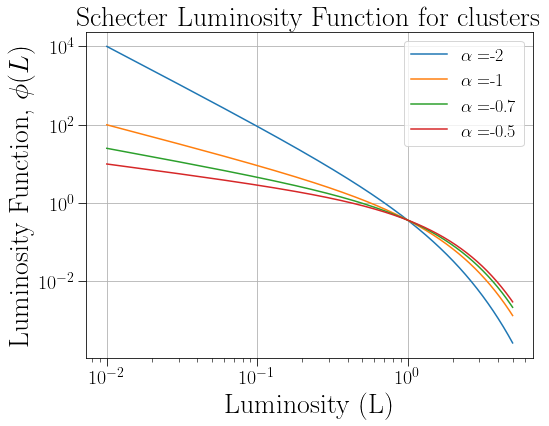

In [48]:

# Define the Schechter function
def schecter_function(L, phi_star, L_star, alpha):
    return phi_star * (L / L_star)**alpha * np.exp(-L / L_star)

# Parameters for the Schechter function
phi_star = 1.0    # Normalization constant
L_star = 1.0      # Characteristic luminosity
alpha_0 = -2
alpha_1 = -1
alpha_2= -0.7
alpha_3= -0.5    # Faint-end slope

# Define the range of luminosity values to plot
L_values = np.linspace(0.01, 5, 500)  # Avoid L=0 to prevent division by zero

# Evaluate the Schechter function for the range of L values
phi_values_0 = schecter_function(L_values, phi_star, L_star, alpha_0)
phi_values_1 = schecter_function(L_values, phi_star, L_star, alpha_1)
phi_values_2 = schecter_function(L_values, phi_star, L_star, alpha_2)
phi_values_3 = schecter_function(L_values, phi_star, L_star, alpha_3)

# Plot the Schechter function
plt.figure(figsize=(8, 6))
plt.plot(L_values, phi_values_0, label=r'$\alpha=$'+ str(alpha_0))
plt.plot(L_values, phi_values_1, label=r'$\alpha=$'+ str(alpha_1))
plt.plot(L_values, phi_values_2, label=r'$\alpha=$'+ str(alpha_2))
plt.plot(L_values, phi_values_3, label=r'$\alpha=$'+ str(alpha_3))
plt.xlabel('Luminosity (L)')
plt.ylabel(r'Luminosity Function, $\phi(L)$')
plt.title('Schecter Luminosity Function for clusters')
plt.xscale('log')  # Use log scale for luminosity axis if needed
plt.yscale('log')  # Use log scale for luminosity function axis if needed
plt.grid(True)
plt.legend()
plt.savefig('figure/lumi_function_plot.pdf', dpi=300)
plt.show()


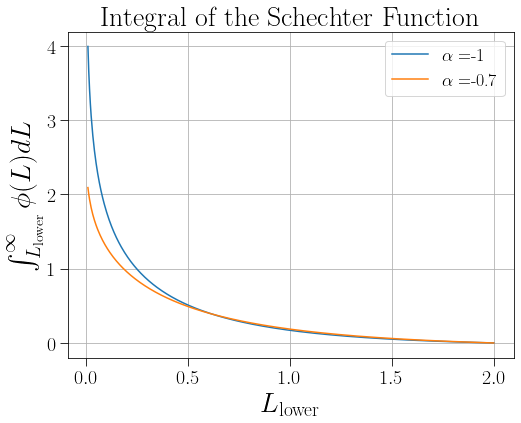

In [47]:

from scipy.integrate import quad

L_upper=2

# Define a function to integrate the Schechter function up to a given L_upper
def schecter_integral(L_lower, phi_star, L_star, alpha):
    result, _ = quad(schecter_function, L_lower, L_upper, args=(phi_star, L_star, alpha))
    return result

# Define the range of upper luminosity values (L_upper) for the integration
L_lower_values = np.linspace(0.01, L_upper, 500)  # Avoid L=0 to prevent division by zero

# Evaluate the integral for each L_upper
integral_values_0 = [schecter_integral(L, phi_star, L_star, alpha_0) for L in L_lower_values]
integral_values_1 = [schecter_integral(L, phi_star, L_star, alpha_1) for L in L_lower_values]
integral_values_2 = [schecter_integral(L, phi_star, L_star, alpha_2) for L in L_lower_values]
# Plot the cumulative integral of the Schechter function
plt.figure(figsize=(8, 6))
#plt.plot(L_upper_values, integral_values_0, label=r'$\alpha=$'+ str(alpha_0))

plt.plot(L_lower_values, integral_values_1, label=r'$\alpha=$'+ str(alpha_1))
plt.plot(L_lower_values, integral_values_2, label=r'$\alpha=$'+ str(alpha_2))
plt.xlabel(r'$L_{\mathrm{lower}}$')
plt.ylabel(r'$\int_{L_{\mathrm{lower}}}^{\infty} \phi(L) dL$')
plt.title('Integral of the Schechter Function')
plt.grid(True)
plt.legend()
plt.savefig('figure/number_function_plot.pdf', dpi=300)

plt.show()
